Seeing how much inclination angle effect curve fitting by: 
1. Fitting theoretical distribution that do not include inlination angle (Maggiore distrbutions) to distributions that do include different inclination angles (Moreno-Garrido distributions)
2. Including inclination angle as a parameter to fit to from spectogram "data" (other notebook)

In [1]:
%%capture output
%run spectrogram_gne_functions.ipynb

In [80]:
# Define parameters
Pi = np.pi

e_inj = np.arange(0.05,0.88,0.03)
theta_inj = np.arange(0,Pi/2,0.1)

nMax=15
returnAll = False 

In [81]:
# Arrays for results: 
e_inj_arr = []
e_recov_arr = []
theta_arr = []

for e0 in e_inj: 
    for theta in theta_inj: 
        
        # Generate power distribution including inclination angle
        nArr, incl_dist = powerDist(nMax,e0,theta)
        
        # Curve fitting without inclination angle (total radiated power)
        e, covar = curve_fit(gnorm, nArr, incl_dist, p0=0.01)
        e_fit = e[0]
        
        e_inj_arr.append(e0)
        e_recov_arr.append(e_fit)
        theta_arr.append(theta)

/home/pycbc/pycbc-software/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


(0, 0.9)

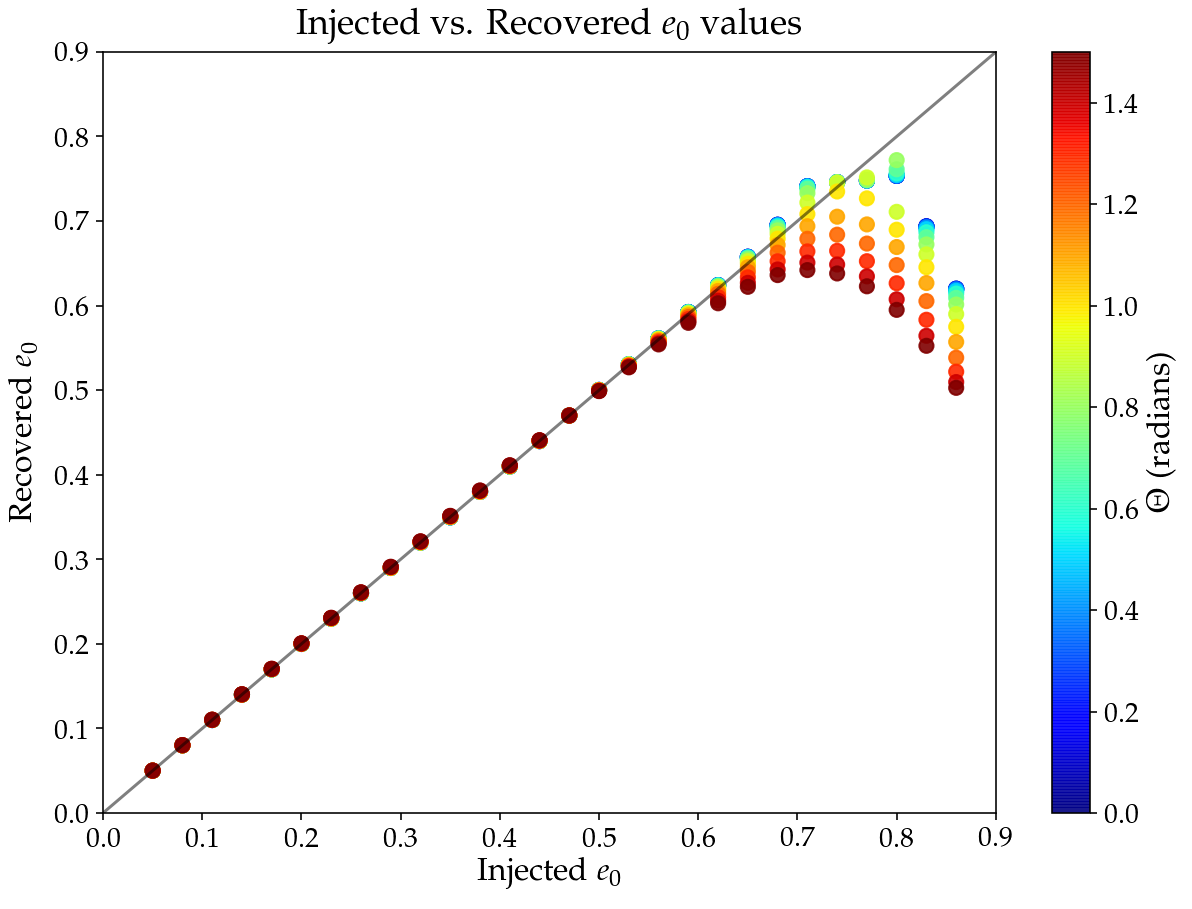

In [85]:
# Plotting results 
diag = np.arange(-0.1,1.0,0.1)
plt.figure(figsize=(10,7))
plt.plot(diag, diag, color='k', alpha=0.5)
plt.scatter(e_inj_arr, e_recov_arr, c=theta_arr, cmap='jet', s=50, alpha=0.9)
plt.title(r"Injected vs. Recovered $e_0$ values", fontsize=18)
plt.xlabel(r"Injected $e_0$", fontsize=16)
plt.ylabel(r"Recovered $e_0$", fontsize=16)
cb = plt.colorbar()
cb.set_label(label=r'$\Theta$ (radians)',fontsize=16)
plt.xlim(0, 0.9)
plt.ylim(0,0.9)

(0.48, 0.8)

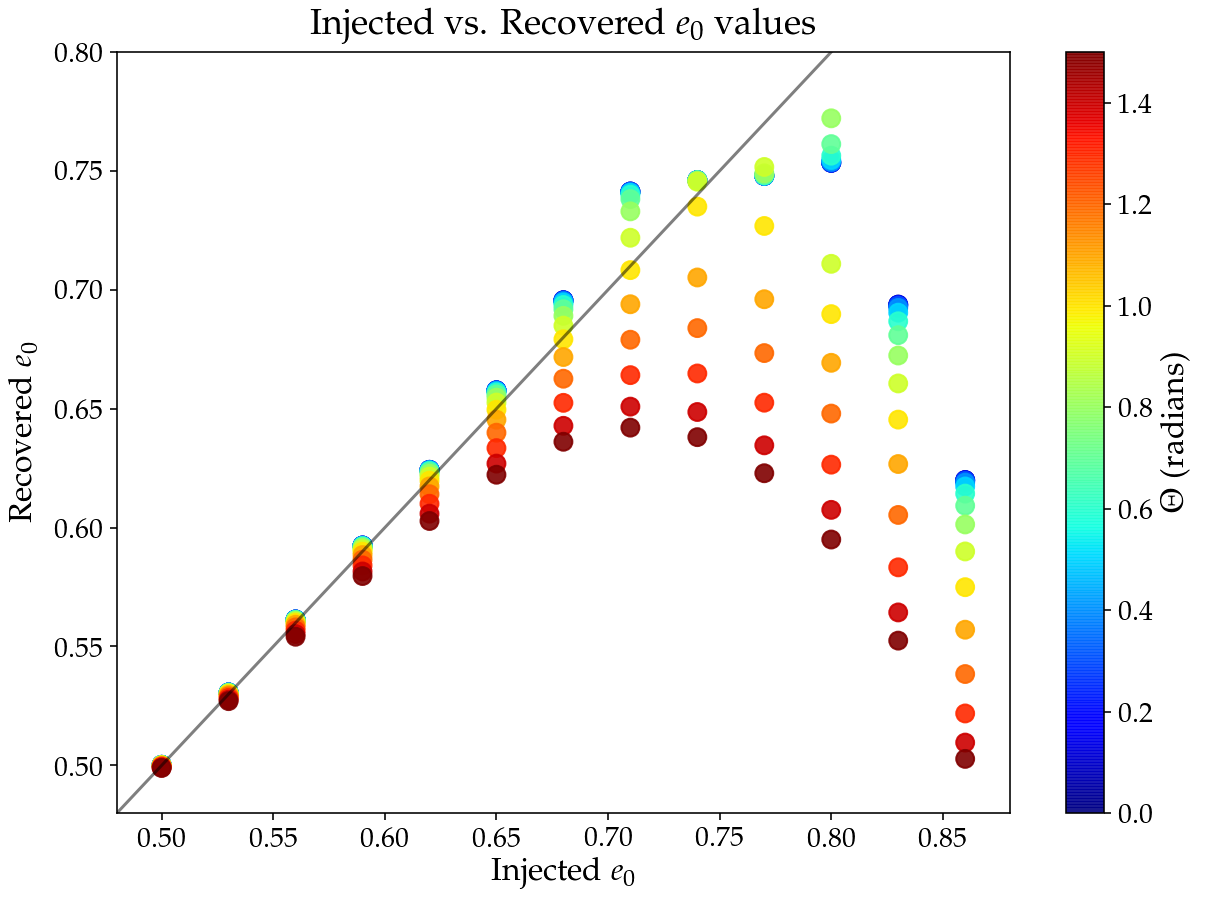

In [89]:
# Plotting results 
plt.figure(figsize=(10,7))
plt.plot(diag, diag, color='k', alpha=0.5)
plt.scatter(e_inj_arr, e_recov_arr, c=theta_arr, cmap='jet', s=80, alpha=0.9)
plt.title(r"Injected vs. Recovered $e_0$ values", fontsize=18)
plt.xlabel(r"Injected $e_0$", fontsize=16)
plt.ylabel(r"Recovered $e_0$", fontsize=16)
cb = plt.colorbar()
cb.set_label(label=r'$\Theta$ (radians)',fontsize=16)
plt.xlim(0.48,0.88)
plt.ylim(0.48,0.80)